In [2]:
from PIL import Image
import numpy as np

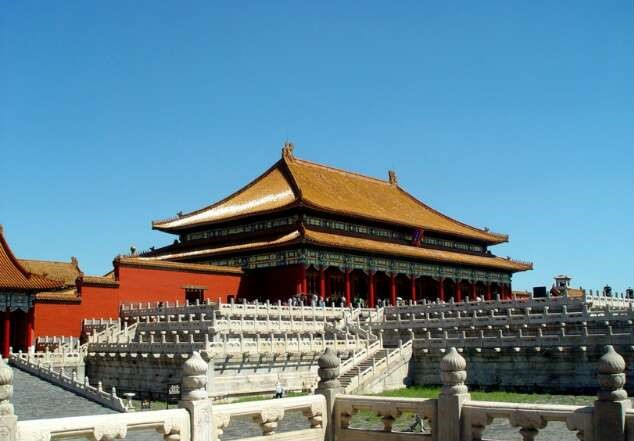

In [19]:
im = Image.open("fcity.jpg")
im

In [20]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=634x441 at 0x21198A560B8>


In [21]:
a = np.array(im)
print(a)

[[[ 53 130 198]
  [ 53 130 198]
  [ 53 130 198]
  ...
  [ 59 141 189]
  [ 68 142 187]
  [ 58 131 172]]

 [[ 53 130 198]
  [ 53 130 198]
  [ 53 130 198]
  ...
  [ 59 141 189]
  [ 68 142 187]
  [ 58 131 172]]

 [[ 53 131 197]
  [ 53 131 197]
  [ 53 131 197]
  ...
  [ 58 140 188]
  [ 68 142 187]
  [ 58 131 172]]

 ...

 [[197 197 173]
  [196 196 172]
  [195 195 171]
  ...
  [ 40  40  40]
  [ 43  43  43]
  [ 45  45  45]]

 [[196 196 172]
  [190 190 166]
  [187 187 163]
  ...
  [ 39  39  39]
  [ 44  44  44]
  [ 46  46  46]]

 [[193 195 171]
  [188 190 166]
  [183 185 161]
  ...
  [ 43  43  43]
  [ 46  46  46]
  [ 49  49  49]]]


In [22]:
a.shape

(441, 634, 3)

In [23]:
a.dtype

dtype('uint8')

# 图像颜色变换

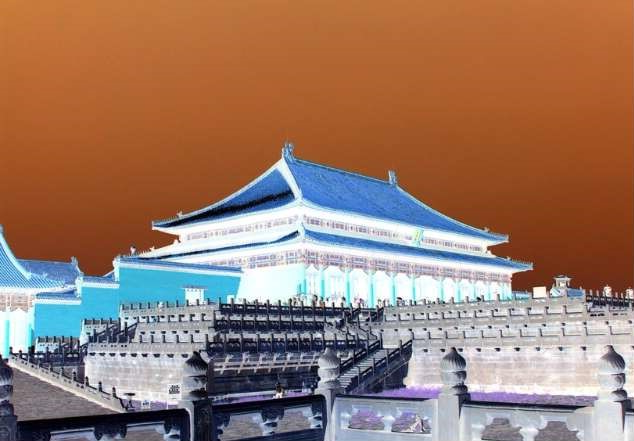

In [24]:
b = [255,255,255]- a
im1 = Image.fromarray(b.astype("uint8"))
im1

# 图像灰度变换

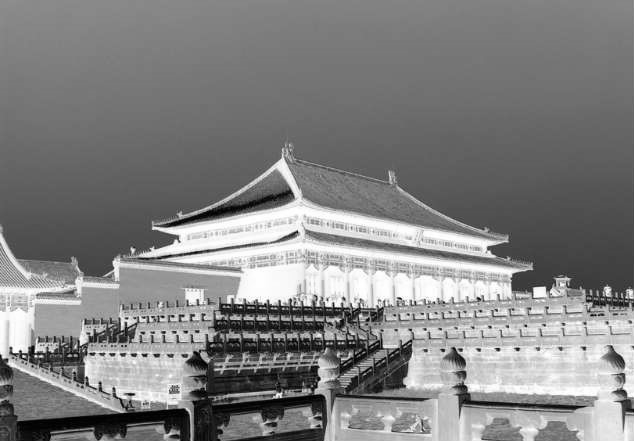

In [25]:
a = np.array(im.convert('L'))
b = 255- a
im1 = Image.fromarray(b.astype("uint8"))
im1

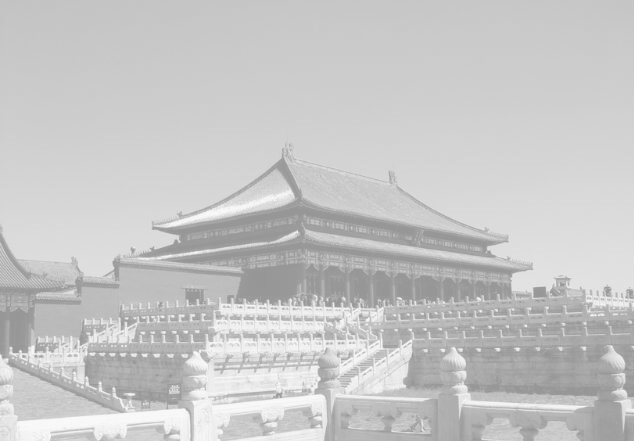

In [36]:
c = a*(100/255)+150 #区间变换
im1 = Image.fromarray(c.astype("uint8"))
im1

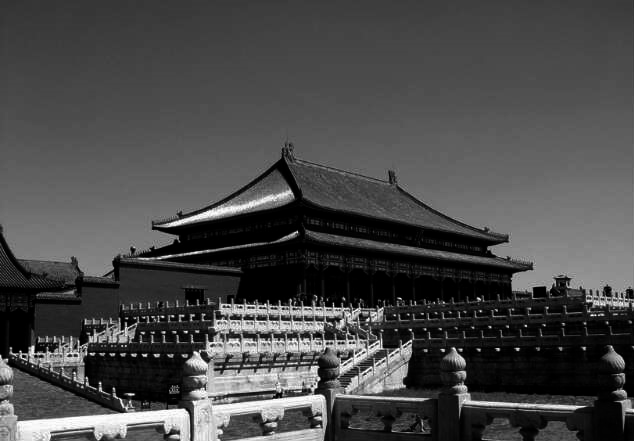

In [34]:
c = (a/255)**2*255  #像素平方
im1 = Image.fromarray(c.astype("uint8"))
im1

# 图像的手绘效果

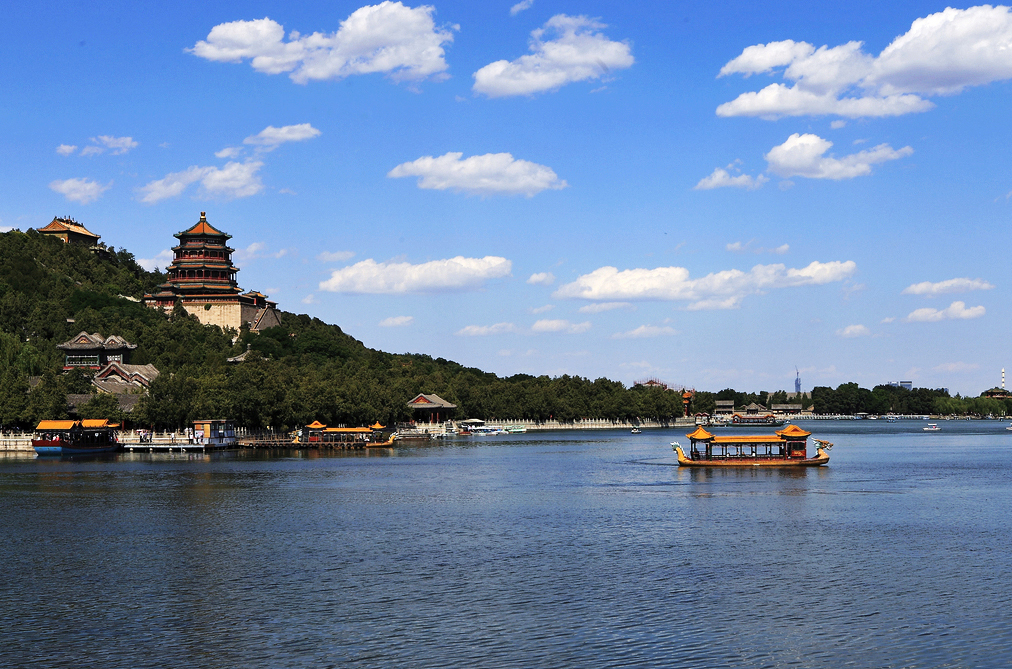

In [48]:
im = Image.open('./beijing.jpg')
im

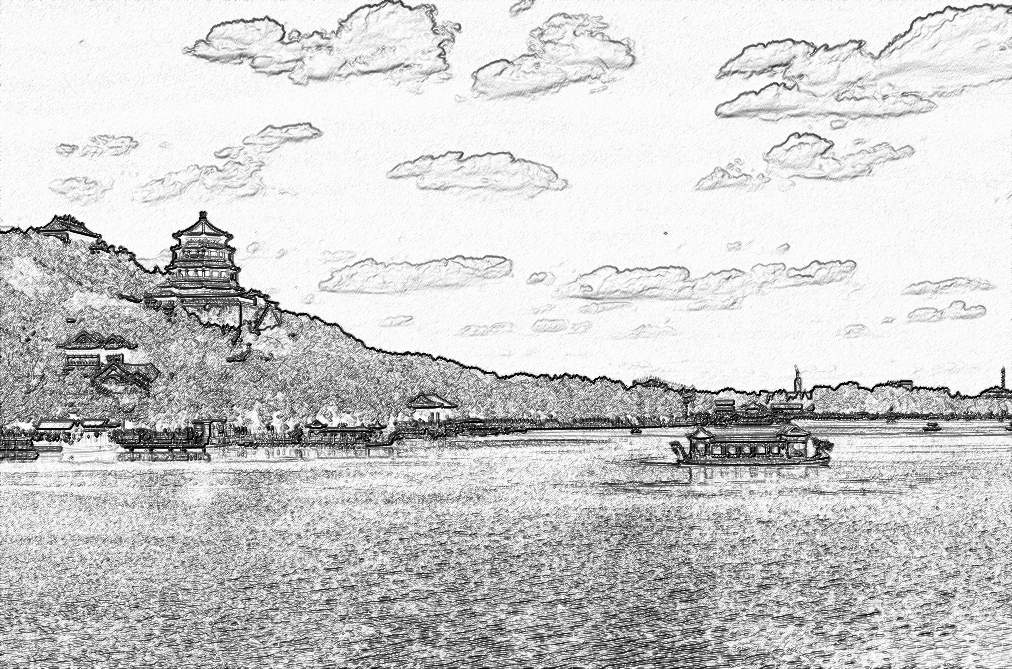

In [54]:
a = np.asarray(im.convert('L')).astype('float')

depth = 10						# (0-100)
grad = np.gradient(a)				#取图像灰度的梯度值
grad_x, grad_y = grad 				#分别取横纵图像梯度值
grad_x = grad_x*depth/100.
grad_y = grad_y*depth/100.
A = np.sqrt(grad_x**2 + grad_y**2 + 1.)
uni_x = grad_x/A
uni_y = grad_y/A
uni_z = 1./A

vec_el = np.pi/2.2 					# 光源的俯视角度，弧度值
vec_az = np.pi/4. 					# 光源的方位角度，弧度值
dx = np.cos(vec_el)*np.cos(vec_az) 	#光源对x 轴的影响
dy = np.cos(vec_el)*np.sin(vec_az) 	#光源对y 轴的影响
dz = np.sin(vec_el) 				#光源对z 轴的影响

b = 255*(dx*uni_x + dy*uni_y + dz*uni_z) 	#光源归一化
b = b.clip(0,255)

im1 = Image.fromarray(b.astype('uint8')) 	#重构图像
im1

In [52]:
im1.save('./beijingHD.jpg')